In [10]:
from pandas import read_csv, DataFrame
import numpy as np


In [11]:
def fft_denoiser(x, n_components, to_real=True):
    """Fast fourier transform denoiser.
    
    Denoises data using the fast fourier transform.
    
    Parameters
    ----------
    x : numpy.array
        The data to denoise.
    n_components : int
        The value above which the coefficients will be kept.
    to_real : bool, optional, default: True
        Whether to remove the complex part (True) or not (False)
        
    Returns
    -------
    clean_data : numpy.array
        The denoised data.
        
    References
    ----------
    .. [1] Steve Brunton - Denoising Data with FFT[Python]
       https://www.youtube.com/watch?v=s2K1JfNR7Sc&ab_channel=SteveBrunton
    
    """
    n = len(x)
    
    # compute the fft
    fft = np.fft.fft(x, n)
    
    # compute power spectrum density
    # squared magnitud of each fft coefficient
    PSD = fft * np.conj(fft) / n
    
    # keep high frequencies
    _mask = PSD > n_components
    fft = _mask * fft
    
    # inverse fourier transform
    clean_data = np.fft.ifft(fft)
    
    if to_real:
        clean_data = clean_data.real
    
    return clean_data


In [26]:
filename = "./formatted/google_5m.csv"
df = read_csv(filename, sep=',', usecols=[1])
df.info()

clean_data1 = fft_denoiser(x=df.values, n_components=0.001)
clean_data2 = fft_denoiser(x=df.values, n_components=0.005)
clean_data3 = fft_denoiser(x=df.values, n_components=0.01)
clean_data4 = fft_denoiser(x=df.values, n_components=0.05)
clean_data5 = fft_denoiser(x=df.values, n_components=0.1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8351 entries, 0 to 8350
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   meanCPUUsage  8351 non-null   float64
dtypes: float64(1)
memory usage: 65.4 KB


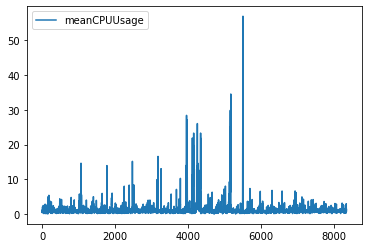

In [27]:
df.plot()

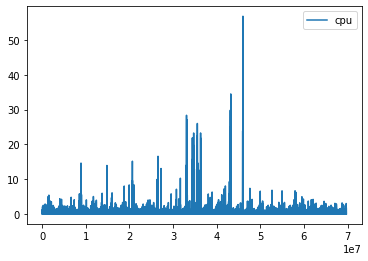

In [25]:
df_clean = DataFrame()
df_clean['cpu1'] = clean_data1.flatten()
df_clean['cpu2'] = clean_data2.flatten()
df_clean['cpu3'] = clean_data3.flatten()
df_clean['cpu4'] = clean_data4.flatten()
df_clean['cpu5'] = clean_data5.flatten()
df_clean.plot()